## Car Sales Regression implemention in R

In [1]:
dataset <- read.csv('car sales.csv')
head(dataset, 5)

Brand,Price,Body,Mileage,EngineV,Engine.Type,Registration,Year,Model
BMW,4200,sedan,277,2.0,Petrol,yes,1991,320
Mercedes-Benz,7900,van,427,2.9,Diesel,yes,1999,Sprinter 212
Mercedes-Benz,13300,sedan,358,5.0,Gas,yes,2003,S 500
Audi,23000,crossover,240,4.2,Petrol,yes,2007,Q7
Toyota,18300,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [2]:
summary(dataset)

           Brand         Price               Body         Mileage     
 Audi         :457   Min.   :   600   crossover: 901   Min.   :  0.0  
 BMW          :694   1st Qu.:  6999   hatch    : 285   1st Qu.: 86.0  
 Mercedes-Benz:921   Median : 11500   other    : 433   Median :155.0  
 Mitsubishi   :327   Mean   : 19419   sedan    :1649   Mean   :161.2  
 Renault      :469   3rd Qu.: 21700   vagon    : 402   3rd Qu.:230.0  
 Toyota       :541   Max.   :300000   van      : 675   Max.   :980.0  
 Volkswagen   :936   NA's   :172                                      
    EngineV       Engine.Type   Registration      Year          Model     
 Min.   : 0.600   Diesel:2019   no : 398     Min.   :1969   E-Class: 199  
 1st Qu.: 1.800   Gas   : 613   yes:3947     1st Qu.:2003   A6     : 172  
 Median : 2.200   Other : 154                Median :2008   Vito   : 171  
 Mean   : 2.791   Petrol:1559                Mean   :2007   Kangoo : 146  
 3rd Qu.: 3.000                              3rd Qu.:2012

In [33]:
# information about the columns

str(dataset)

'data.frame':	3840 obs. of  9 variables:
 $ Brand       : Factor w/ 7 levels "Audi","BMW","Mercedes-Benz",..: 2 3 3 1 6 1 5 7 5 5 ...
 $ Price       : num  4200 7900 13300 23000 18300 ...
 $ Body        : Factor w/ 6 levels "crossover","hatch",..: 4 6 4 1 1 5 5 3 5 4 ...
 $ Mileage     : int  277 427 358 240 120 200 193 212 177 260 ...
 $ EngineV     : num  2 2.9 5 4.2 2 2.7 1.5 1.8 1.5 1.79 ...
 $ Engine.Type : Factor w/ 4 levels "Diesel","Gas",..: 4 1 2 4 4 1 1 2 1 4 ...
 $ Registration: Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 1 2 2 ...
 $ Year        : int  1991 1999 2003 2007 2011 2006 2012 1999 2011 1994 ...
 $ log_price   : num  8.34 8.97 9.5 10.04 9.81 ...


In [3]:
# listing out the dataset columns

names(dataset)

[1] "Brand"        "Price"        "Body"         "Mileage"      "EngineV"     
[6] "Engine.Type"  "Registration" "Year"         "Model"

In [4]:
# Droping the Model column

# can also use the line of code below
#dataset <- subset(dataset, select = c('Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine.Type', 'Registration', 'Year'))

dataset <- dataset[,!(names(dataset) %in% 'Model')]

head(dataset,5)

Brand,Price,Body,Mileage,EngineV,Engine.Type,Registration,Year
BMW,4200,sedan,277,2.0,Petrol,yes,1991
Mercedes-Benz,7900,van,427,2.9,Diesel,yes,1999
Mercedes-Benz,13300,sedan,358,5.0,Gas,yes,2003
Audi,23000,crossover,240,4.2,Petrol,yes,2007
Toyota,18300,crossover,120,2.0,Petrol,yes,2011


In [5]:
# checking the number of missing values

na_count <-sapply(dataset, function(y) sum(length(which(is.na(y)))))
na_count <- data.frame(na_count)
na_count

,na_count
Brand,0
Price,172
Body,0
Mileage,0
EngineV,150
Engine.Type,0
Registration,0
Year,0


In [6]:
# drop all the null value

dataset <- na.omit(dataset)
summary(dataset)

           Brand         Price               Body         Mileage     
 Audi         :420   Min.   :   600   crossover: 824   Min.   :  0.0  
 BMW          :640   1st Qu.:  6999   hatch    : 268   1st Qu.: 90.0  
 Mercedes-Benz:823   Median : 11500   other    : 394   Median :158.0  
 Mitsubishi   :307   Mean   : 19552   sedan    :1534   Mean   :163.6  
 Renault      :445   3rd Qu.: 21900   vagon    : 379   3rd Qu.:230.0  
 Toyota       :510   Max.   :300000   van      : 626   Max.   :980.0  
 Volkswagen   :880                                                    
    EngineV       Engine.Type   Registration      Year     
 Min.   : 0.600   Diesel:1861   no : 371     Min.   :1969  
 1st Qu.: 1.800   Gas   : 590   yes:3654     1st Qu.:2003  
 Median : 2.200   Other : 106                Median :2007  
 Mean   : 2.765   Petrol:1468                Mean   :2006  
 3rd Qu.: 3.000                              3rd Qu.:2012  
 Max.   :99.990                              Max.   :2016  
            

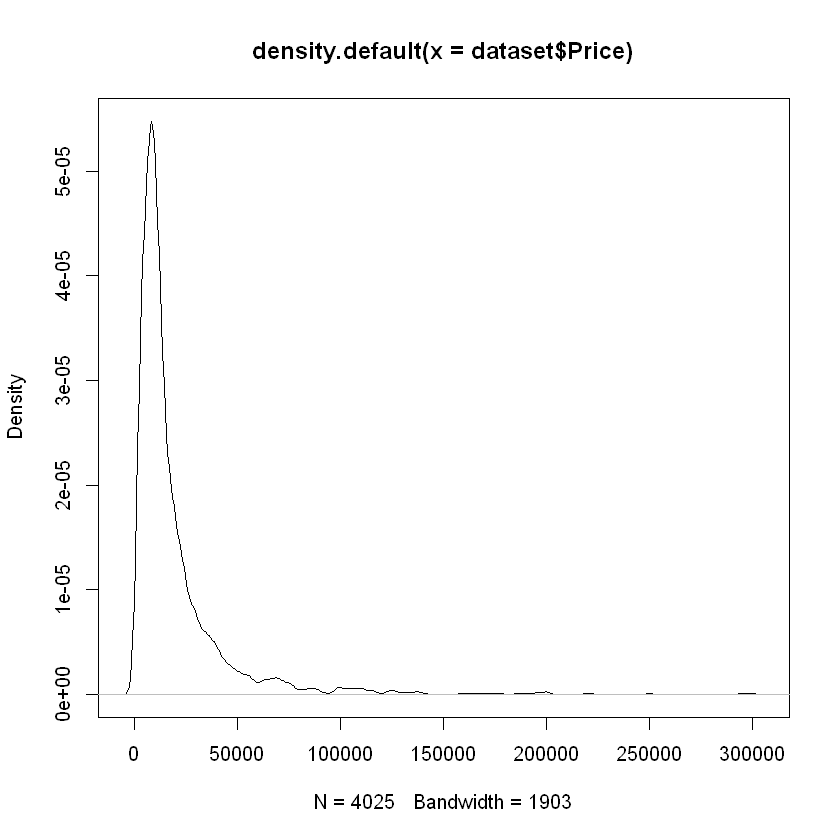

In [7]:
# ploting to check for outliers in price columns

price <- density(dataset$Price)
plot(price)

In [8]:
# removing outlier from the price columns


dataset <- subset(dataset, dataset$Price < quantile(dataset$Price, 0.99))

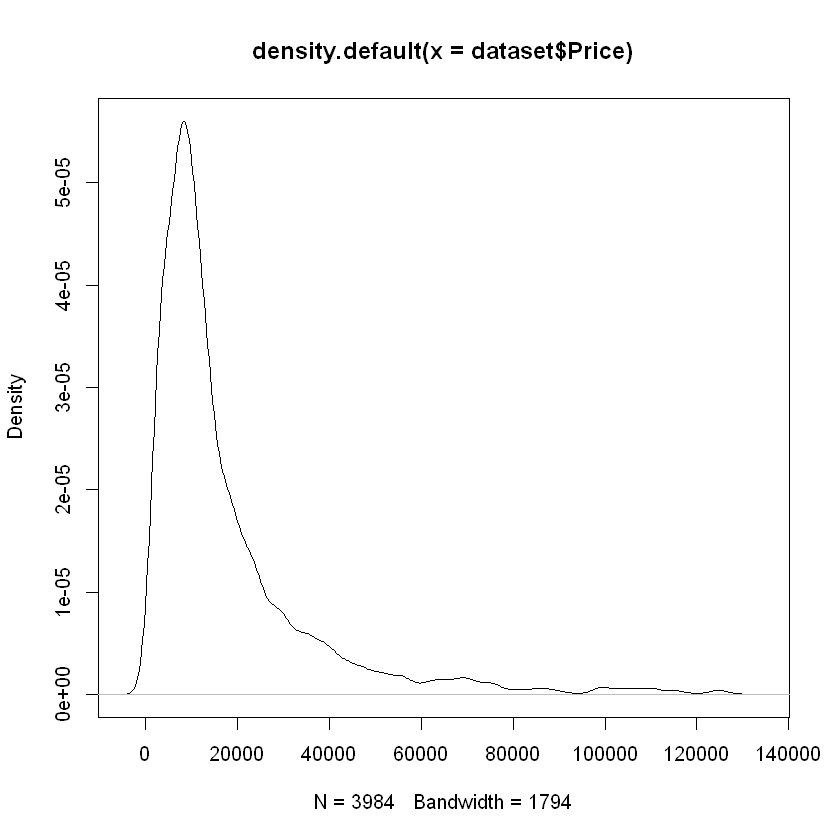

In [9]:
# ploting for price column one more to see outlier removed
price <- density(dataset$Price)
plot(price)

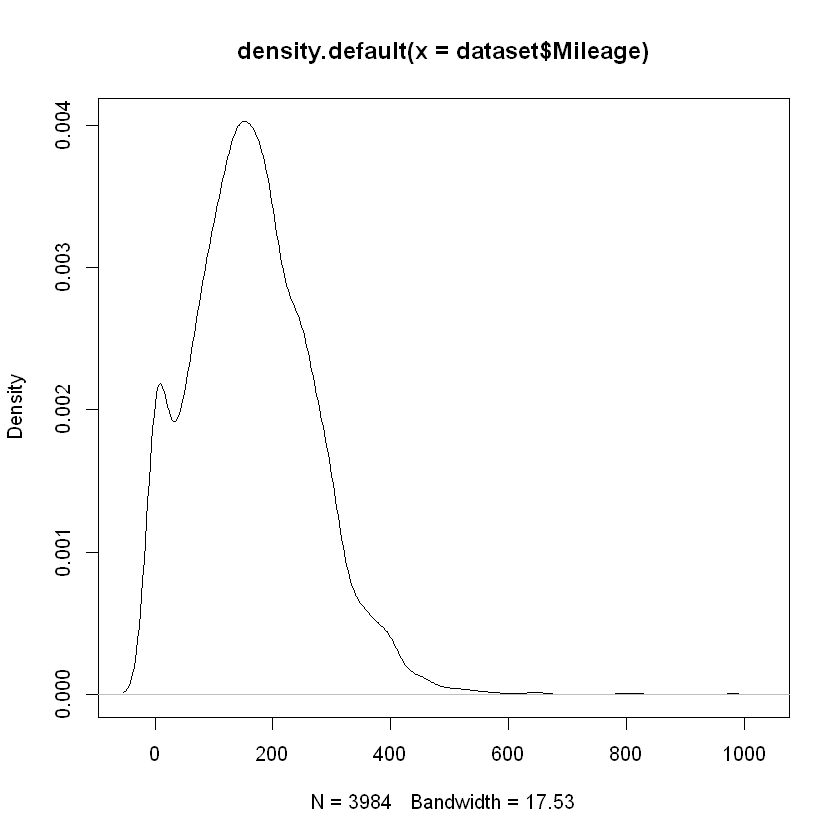

In [10]:
# ploting to check for outlier in mileage column

mileage <- density(dataset$Mileage)
plot(mileage)

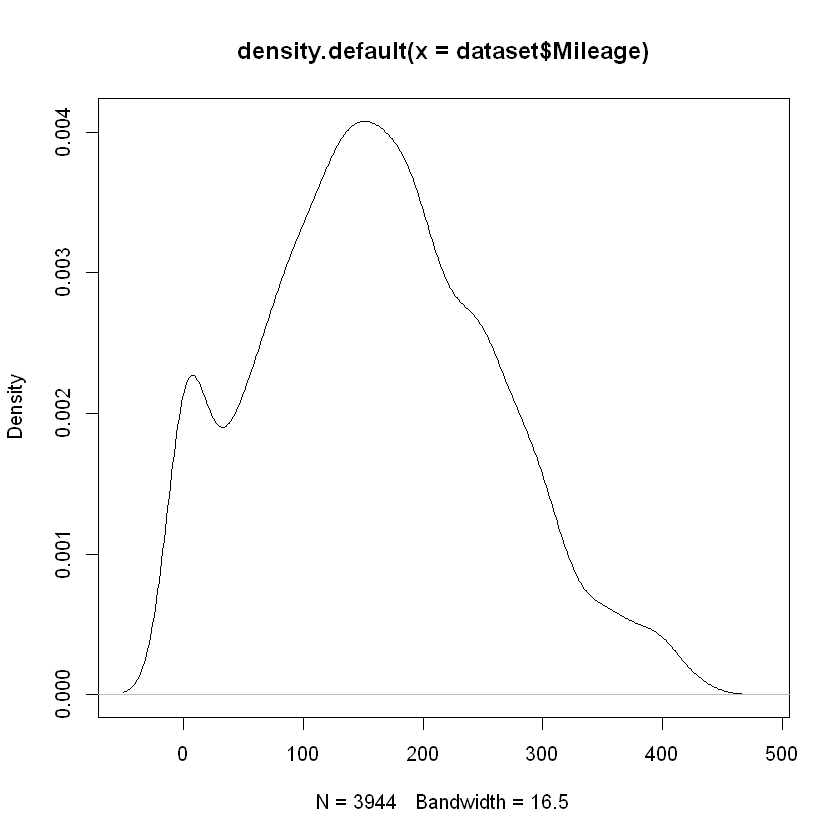

In [11]:
# to remove outlier in the mileage column 

dataset <- subset(dataset, dataset$Mileage < quantile(dataset$Mileage, 0.99))

mileage <- density(dataset$Mileage)
plot(mileage)

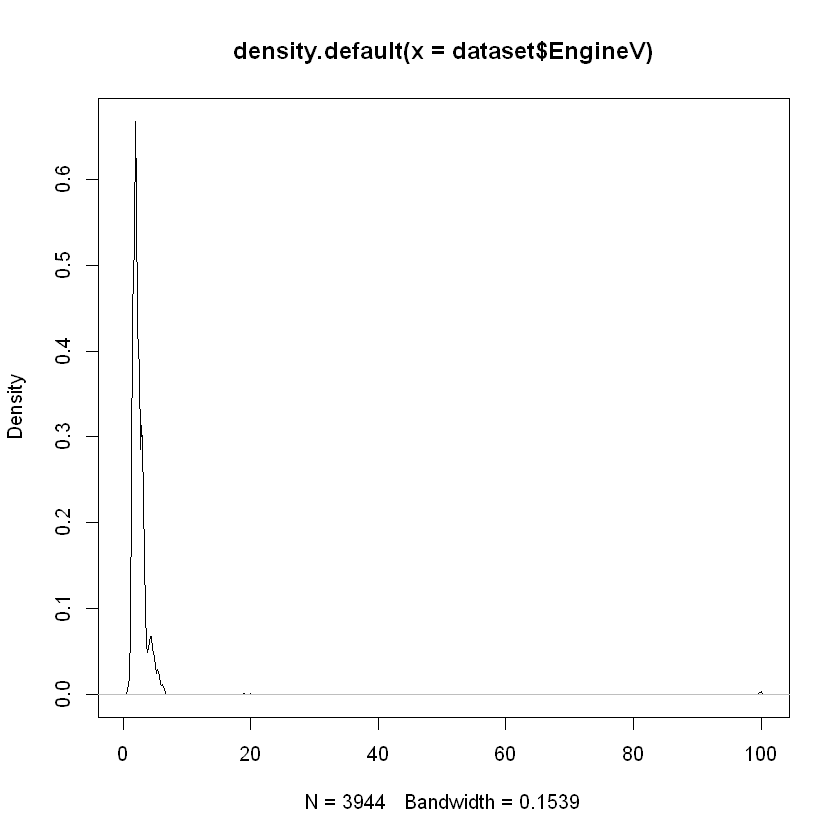

In [12]:
engineV <- density(dataset$EngineV)
plot(engineV)

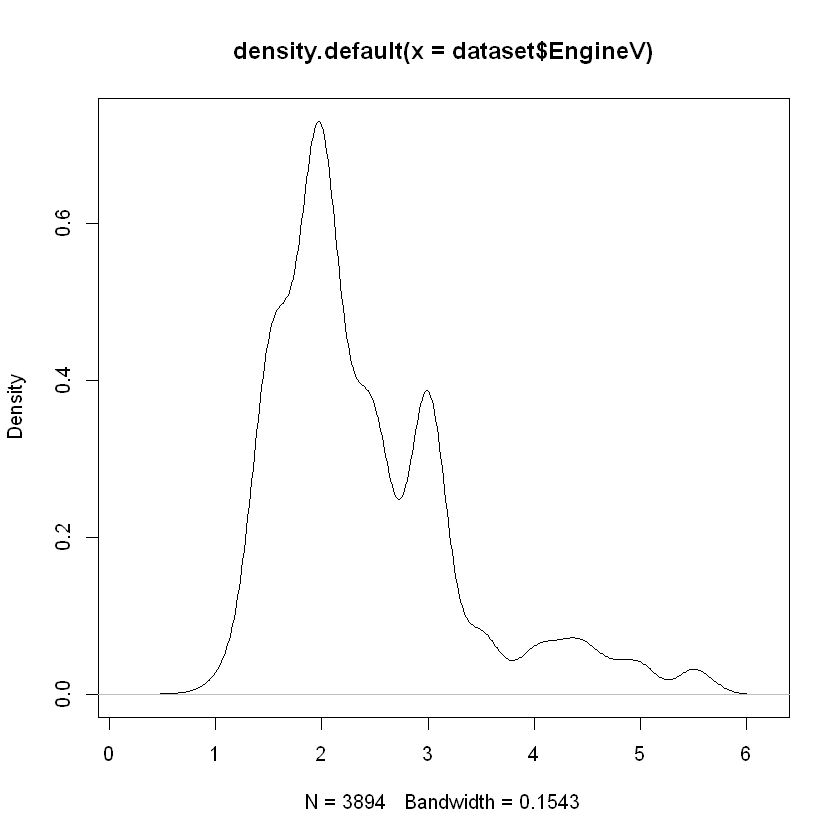

In [13]:
# reducing engine volume to value of 6 to remove outragoeus imput

dataset <- subset(dataset, dataset$EngineV < 6)

engineV <- density(dataset$EngineV)
plot(engineV)

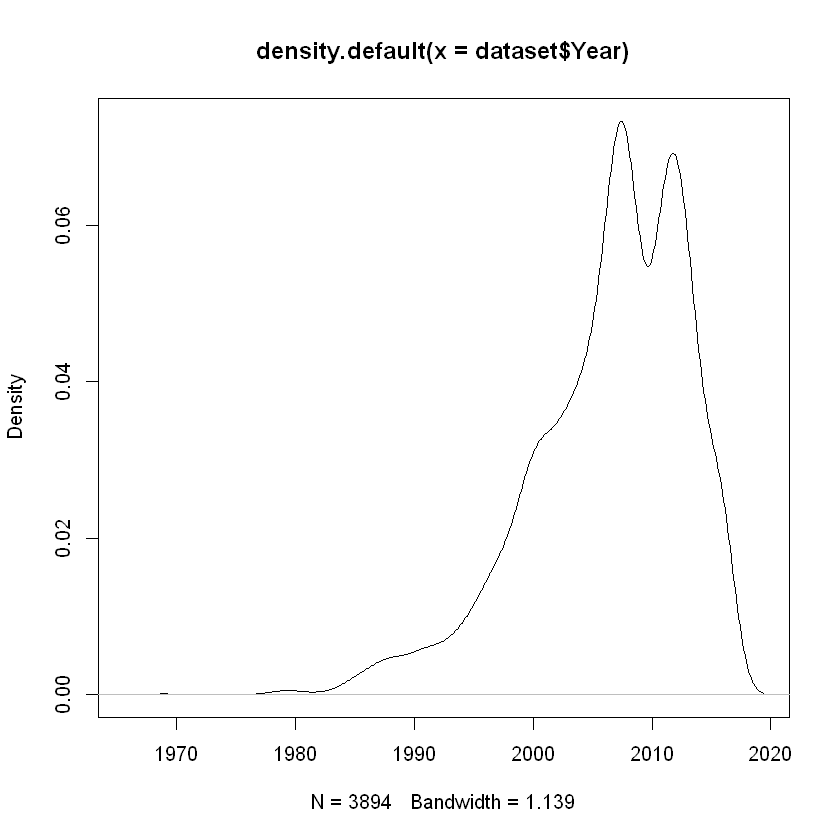

In [14]:
year <- density(dataset$Year)
plot(year)

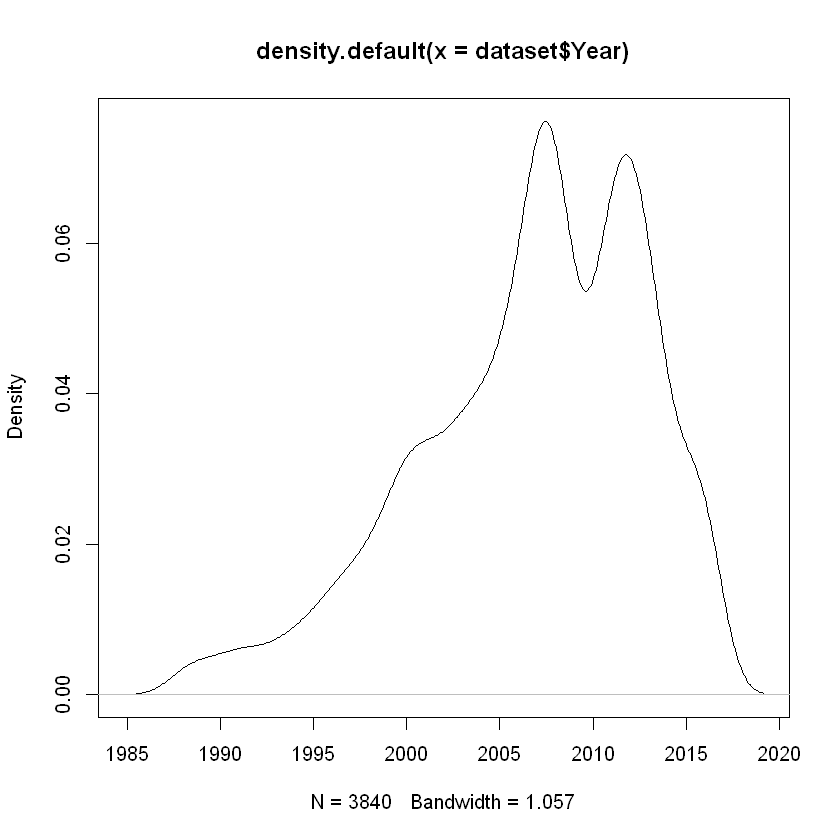

In [15]:
# removing the outliers from the year column

dataset <- subset(dataset, dataset$Year>quantile(dataset$Year, 0.01))

year <- density(dataset$Year)
plot(year)

## Checking and relaxing assumptions

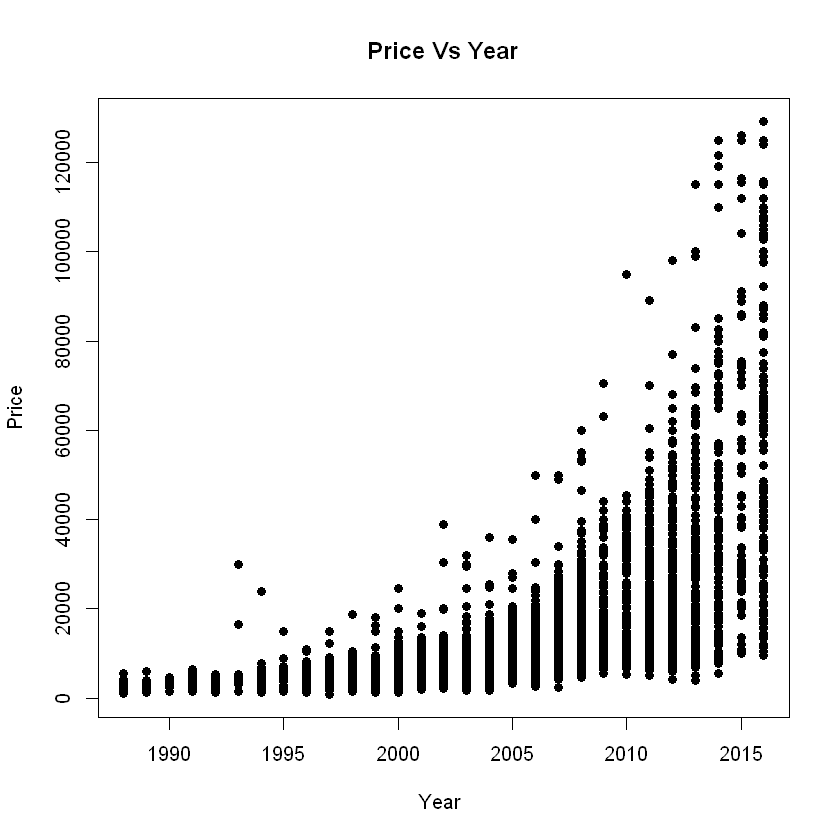

In [16]:
# scatter plot showing Price and Year

plot(dataset$Year, dataset$Price, main="Price Vs Year", xlab="Year ", ylab="Price", pch=19)

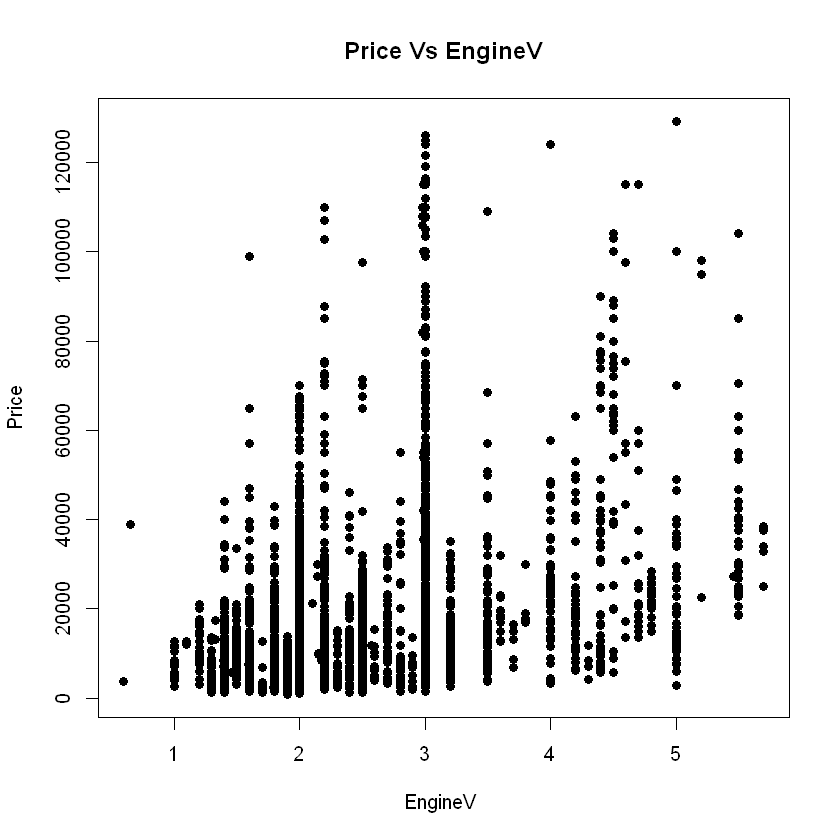

In [17]:
# scatter plot showing Price and engine volume

plot(dataset$EngineV, dataset$Price, main="Price Vs EngineV", xlab="EngineV ", ylab="Price", pch=19)

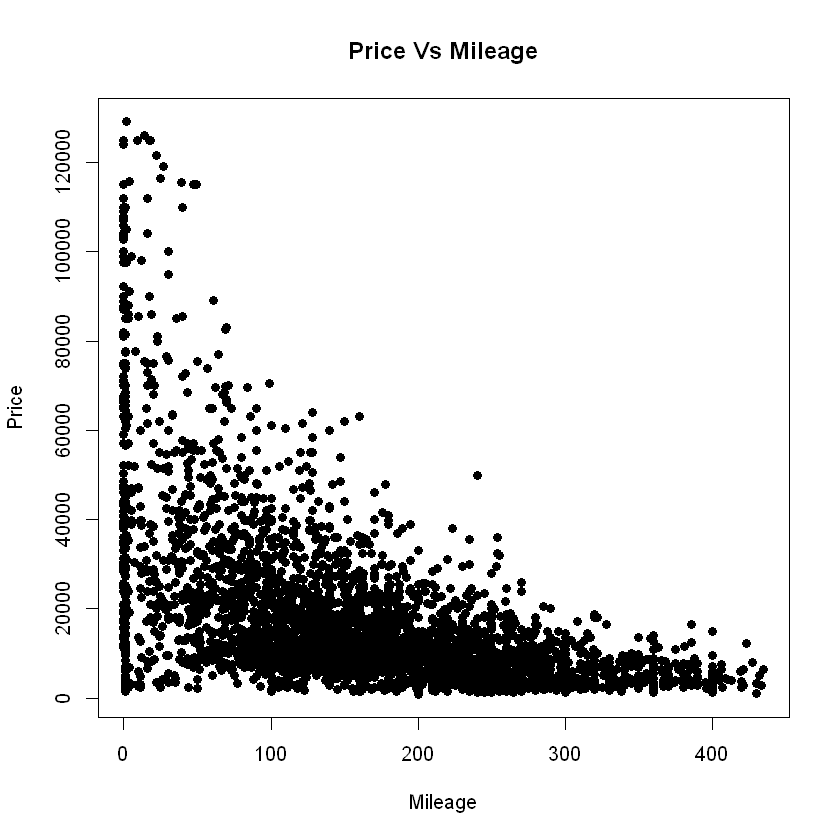

In [18]:
# scatter plot for Price and mileage

plot(dataset$Mileage, dataset$Price, main="Price Vs Mileage", xlab="Mileage", ylab="Price", pch=19)

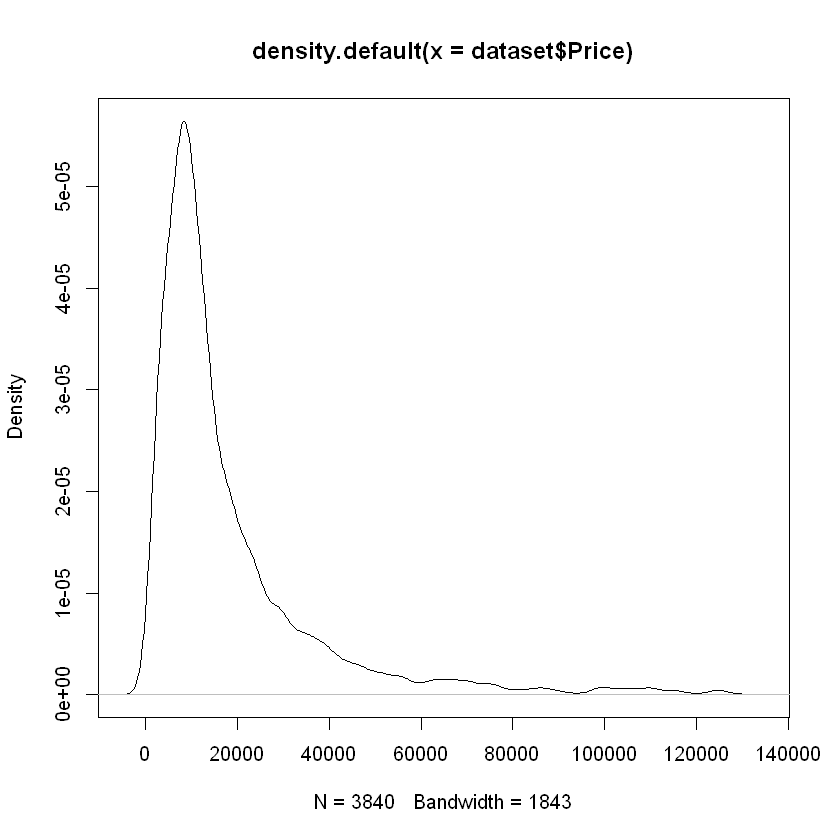

In [19]:
# density plot for price
density <- density(dataset$Price)
plot(density)

In [24]:
# relax the assumption 
# do log of price

dataset$log_price <- log(dataset$Price)
head(dataset, 3)

Brand,Price,Body,Mileage,EngineV,Engine.Type,Registration,Year,log_price
BMW,4200,sedan,277,2.0,Petrol,yes,1991,8.342840
Mercedes-Benz,7900,van,427,2.9,Diesel,yes,1999,8.974618
Mercedes-Benz,13300,sedan,358,5.0,Gas,yes,2003,9.495519


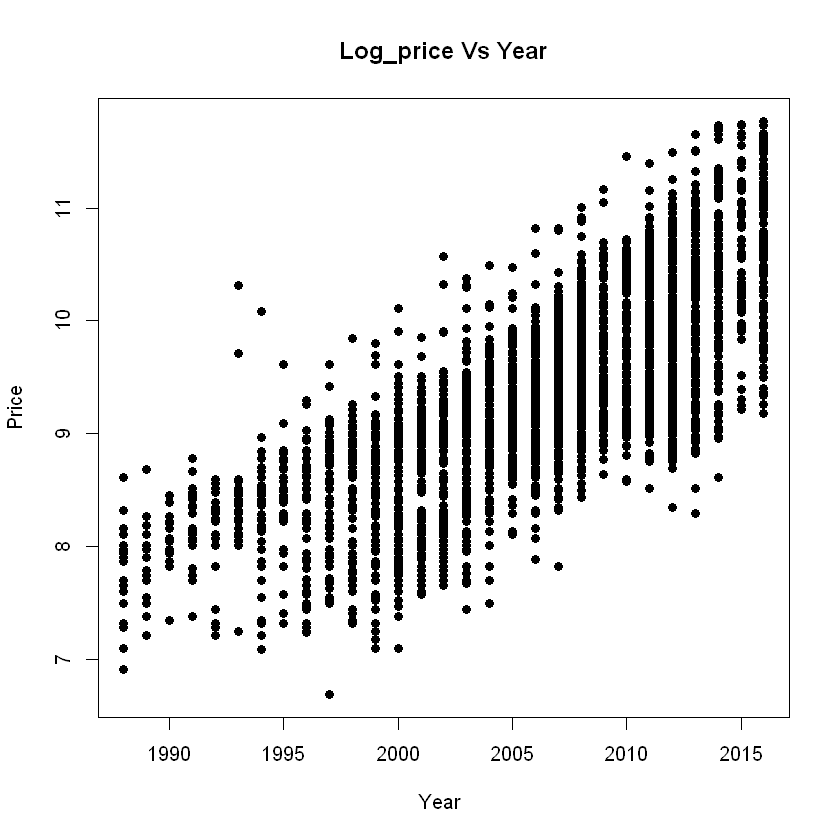

In [26]:
# scatter plot showing Price and Year, checking again

plot(dataset$Year, dataset$log_price, main="Log_price Vs Year", xlab="Year ", ylab="Price", pch=19)

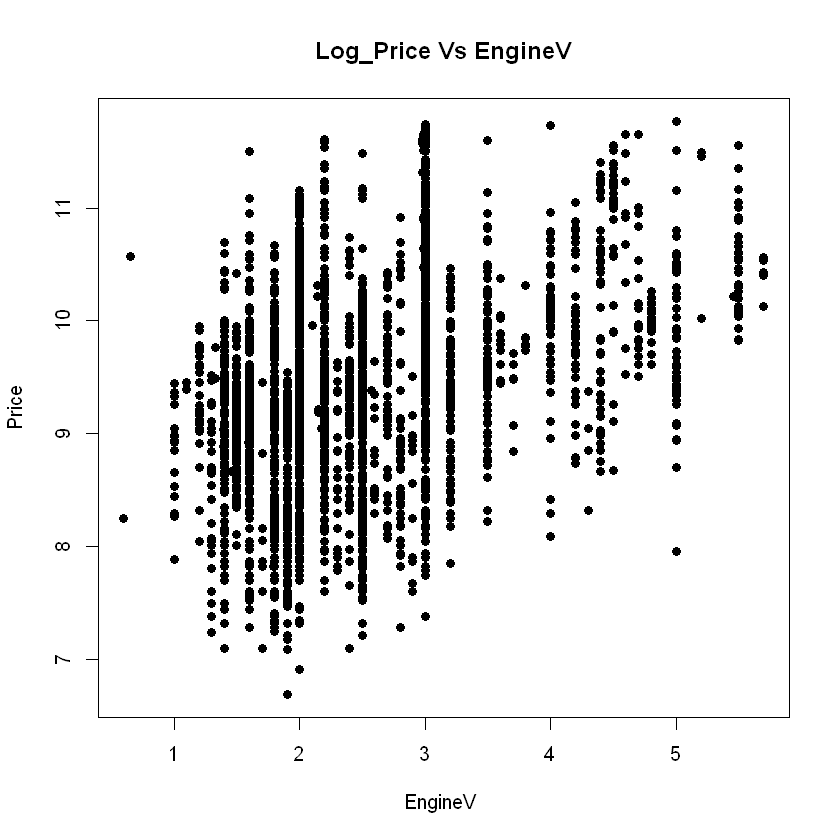

In [27]:
# scatter plot showing Price and engine volume, checking again

plot(dataset$EngineV, dataset$log_price, main="Log_Price Vs EngineV", xlab="EngineV ", ylab="Price", pch=19)

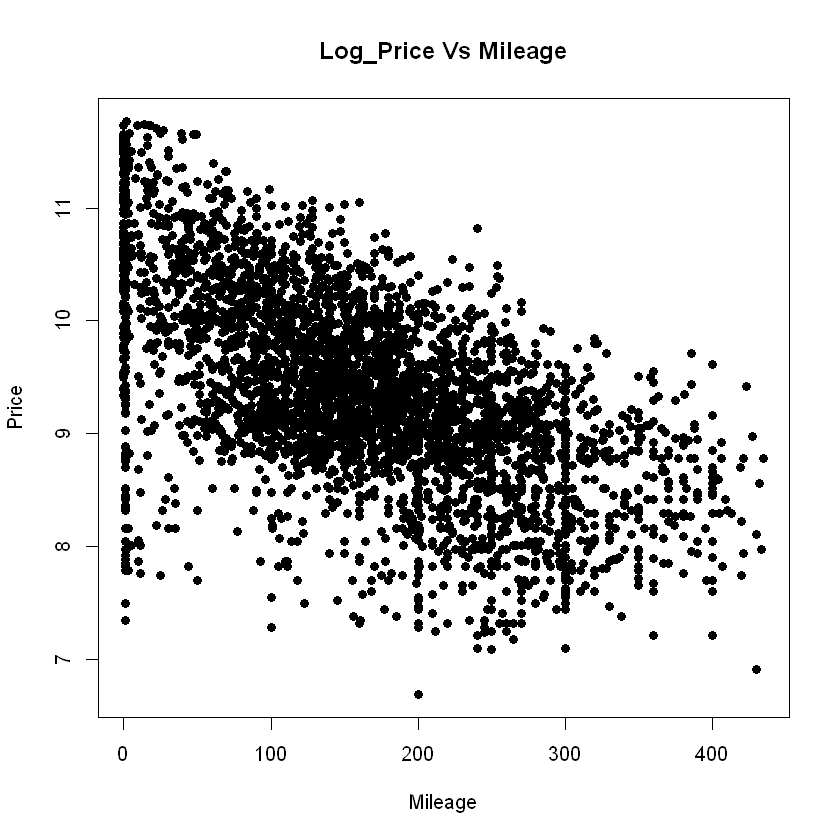

In [31]:
# scatter plot for Price and mileage, checking again

plot(dataset$Mileage, dataset$log_price, main="Log_Price Vs Mileage", xlab="Mileage", ylab="Price", pch=19)

In [32]:
dataset

,Brand,Price,Body,Mileage,EngineV,Engine.Type,Registration,Year,log_price
1,BMW,4200,sedan,277,2.00,Petrol,yes,1991,8.342840
2,Mercedes-Benz,7900,van,427,2.90,Diesel,yes,1999,8.974618
3,Mercedes-Benz,13300,sedan,358,5.00,Gas,yes,2003,9.495519
4,Audi,23000,crossover,240,4.20,Petrol,yes,2007,10.043249
5,Toyota,18300,crossover,120,2.00,Petrol,yes,2011,9.814656
8,Audi,14200,vagon,200,2.70,Diesel,yes,2006,9.560997
9,Renault,10799,vagon,193,1.50,Diesel,yes,2012,9.287209
10,Volkswagen,1400,other,212,1.80,Gas,no,1999,7.244228
11,Renault,11950,vagon,177,1.50,Diesel,yes,2011,9.388487
12,Renault,2500,sedan,260,1.79,Petrol,yes,1994,7.824046
